<a href="https://colab.research.google.com/github/Washington055/Projects/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
from google.colab import files
df = files.upload()

Saving PJME_hourly.csv to PJME_hourly.csv


In [3]:
df = pd.read_csv("PJME_hourly.csv")
df = df.set_index("Datetime")
df.index = pd.to_datetime(df.index)

In [4]:
df.head(5)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [5]:
df.tail(5)

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


In [6]:
color = sns.color_palette

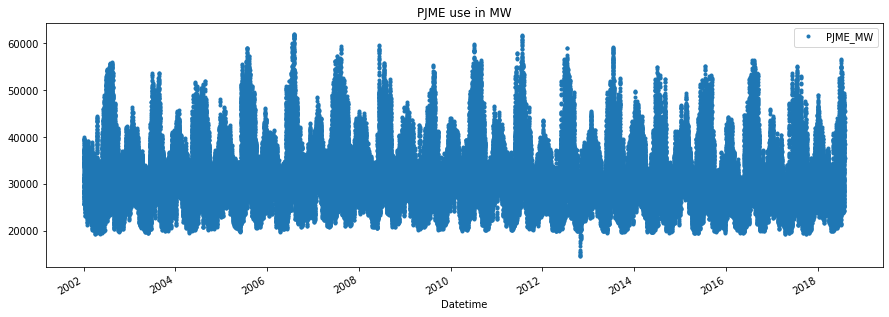

In [7]:

df.plot(style=".", 
        figsize=(15,5),
        title="PJME use in MW" )
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

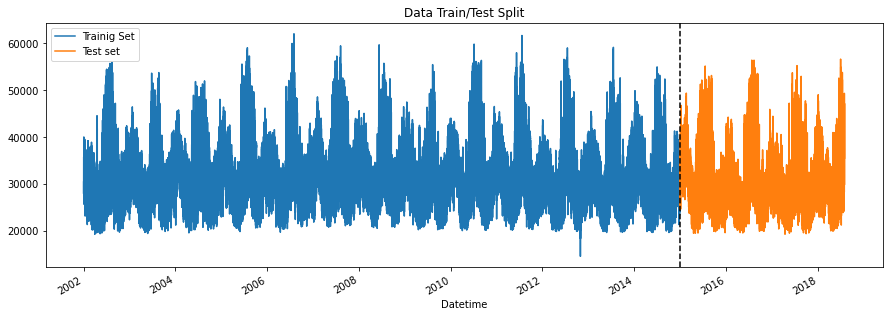

In [8]:
train = df.loc[df.index < "01-01-2015"]
test = df.loc[df.index >= "01-01-2015"]

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax,label="Training Set", title="Data Train/Test Split")
test.plot(ax=ax,label="Test Set")
ax.axvline("01-01-2015", color="black", ls="--")
ax.legend(["Trainig Set", "Test set"])
plt.show

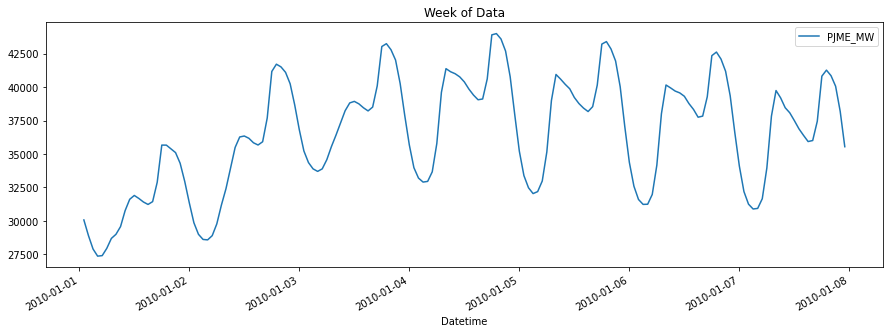

In [9]:
df.loc[(df.index > "01-01-2010") & (df.index < "01-08-2010")].plot(figsize=(15,5), title="Week of Data")


##FEATURE CREATION


In [10]:
def create_features(df):
  df["Hour"]= df.index.hour
  df["Day_of_week"]= df.index.day_of_week
  df["Quarter"]= df.index.quarter
  df["Month"]= df.index.month
  df["Year"]= df.index.year
  df["Day_of_year"]= df.index.dayofyear
  return df 



In [11]:
df= create_features(df)

In [12]:
df.head()

,PJME_MW,Hour,Day_of_week,Quarter,Month,Year,Day_of_year
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365


##Visualize our Feature / Target Relationship


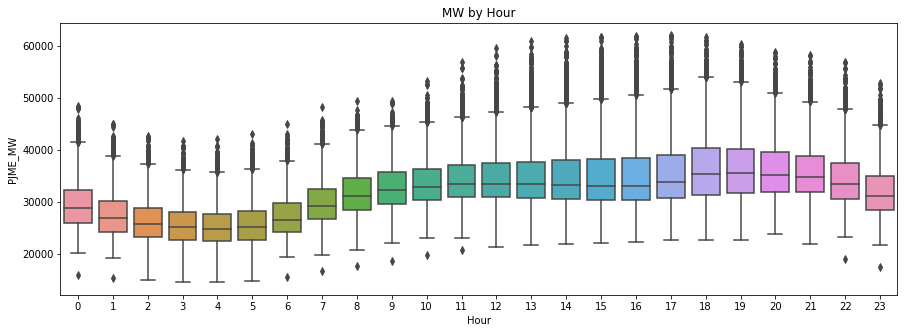

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x="Hour", y="PJME_MW")
ax.set_title("MW by Hour")
plt.show()

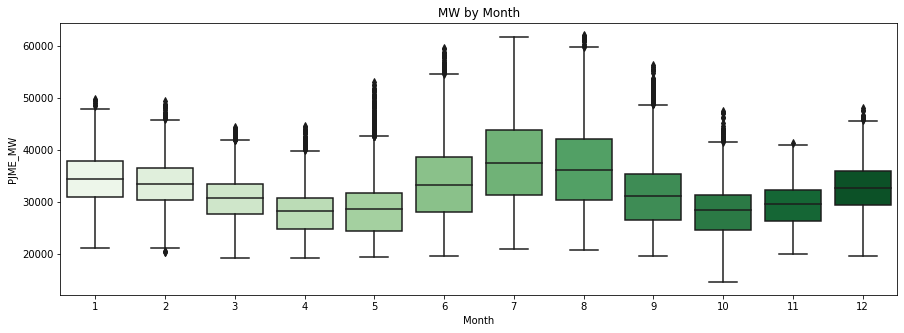

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x="Month", y="PJME_MW", palette="Greens")
ax.set_title("MW by Month")
plt.show()

##Create our Model

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
train = create_features(train)
test = create_features(test)


<ipython-input-10-42ab21ed5bba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour"]= df.index.hour
<ipython-input-10-42ab21ed5bba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Day_of_week"]= df.index.day_of_week
<ipython-input-10-42ab21ed5bba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [17]:
FEATURES = ['Hour', 'Day_of_week', 'Quarter', 'Month', 'Year',
       'Day_of_year']
TARGET = 'PJME_MW'

In [18]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [39]:
reg = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50, learning_rate=0.001)
reg.fit(X_train, y_train, 
        eval_set=[(X_train, y_train),(X_test, y_test)],verbose=100)

[23:57:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32895	validation_1-rmse:31947.1
[100]	validation_0-rmse:29835.2	validation_1-rmse:28892.3
[200]	validation_0-rmse:27071.9	validation_1-rmse:26138.6
[300]	validation_0-rmse:24572.3	validation_1-rmse:23649.2
[400]	validation_0-rmse:22315.4	validation_1-rmse:21399.1
[500]	validation_0-rmse:20278	validation_1-rmse:19369.4
[600]	validation_0-rmse:18440.5	validation_1-rmse:17542.3
[700]	validation_0-rmse:16776.3	validation_1-rmse:15889.4
[800]	validation_0-rmse:15283.2	validation_1-rmse:14409.3
[900]	validation_0-rmse:13941.4	validation_1-rmse:13082.9
[999]	validation_0-rmse:12748	validation_1-rmse:11908


XGBRegressor(early_stopping_rounds=50, learning_rate=0.001, n_estimators=1000)

##Feature Importance

In [40]:
fi = pd.DataFrame(data=reg.feature_importances_,index=FEATURES,
             columns =["Importance"]) 

In [41]:
fi

,Importance
Hour,0.325034
Day_of_week,0.145736
Quarter,0.000000
Month,0.409491
Year,0.007237
Day_of_year,0.112502


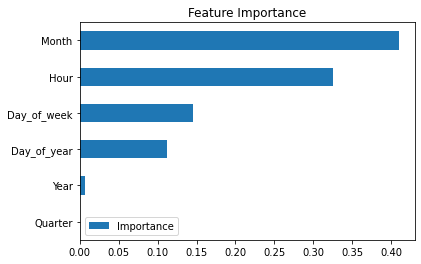

In [42]:
fi.sort_values("Importance").plot(kind="barh", title="Feature Importance")
plt.show()

##Forecast Test

In [46]:
test["prediction"] = reg.predict(X_test)

<ipython-input-46-d2cc01c4b3b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["prediction"] = reg.predict(X_test)


In [47]:
df = df.merge(test["prediction"], how="left", left_index=True, right_index=True  )

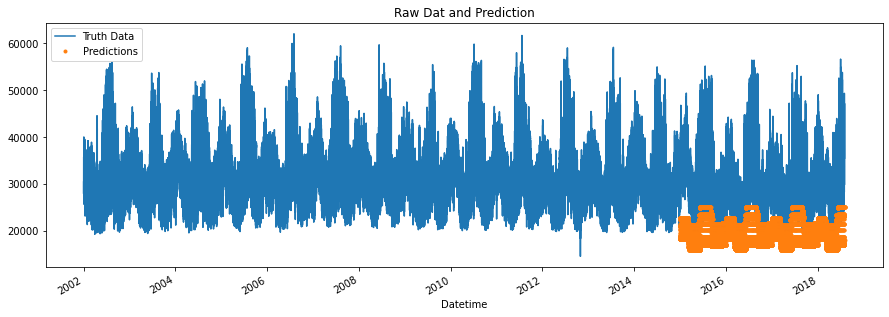

In [49]:
ax = df[["PJME_MW"]].plot(figsize=(15,5))
df["prediction"].plot(ax=ax, style=".")
plt.legend(["Truth Data", "Predictions"])
ax.set_title("Raw Dat and Prediction")
plt.show()

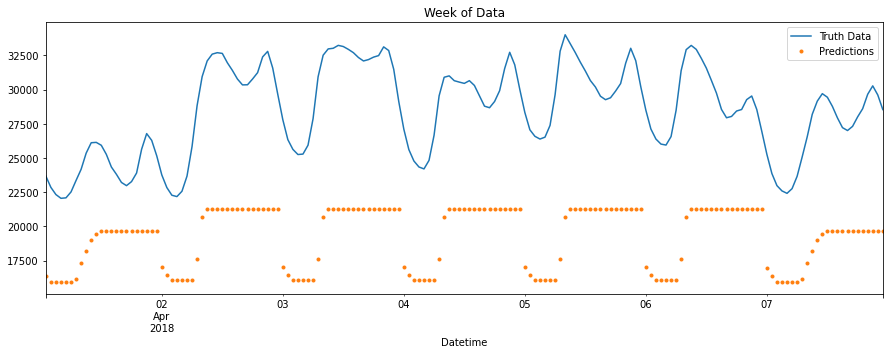

In [51]:
ax = df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]["PJME_MW"].plot(figsize=(15,5), title="Week of Data")
df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]["prediction"].plot(style=".")
plt.legend(["Truth Data", "Predictions"])
plt.show()